In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
#importing the datase

df=pd.read_csv(r"C:\Users\Admin\311_Service_Requests_from_2010_to_Present.csv")

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
df.shape

(300698, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
# duration
df['Request_Closing_Time'] = df["Closed Date"]-df["Created Date"]

In [7]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33


In [8]:
df.drop(df.columns[[0, 13, 14, 17, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38 , 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]], axis=1, inplace=True)

In [9]:
df.dropna(inplace=True)

<AxesSubplot:>

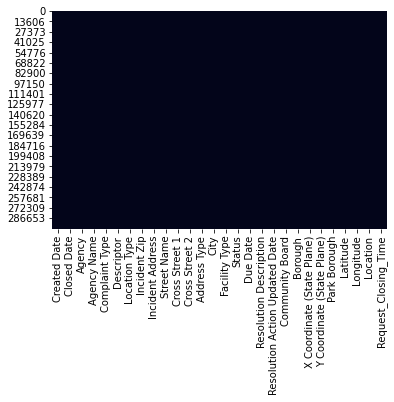

In [10]:
sns.heatmap(df.isnull(), cbar=False)

# explore datetime

In [11]:
# day
df['Day'] = df['Created Date'].dt.day
# month
df['Month'] = df['Created Date'].dt.month
# year
df['Year'] = df['Created Date'].dt.year
# hour
df['Start_hour'] = df['Created Date'].dt.hour
# minute
df['Start_minute'] = df['Created Date'].dt.minute
# second
df['Start_second'] = df['Created Date'].dt.second
# Monday is 0 and Sunday is 6
df['Start_weekday'] = df['Created Date'].dt.weekday
# week of the year
df['Start_week_of_year'] = df['Created Date'].dt.isocalendar().week


In [12]:
from datetime import timedelta

In [13]:
df['Duration_days'] = df['Request_Closing_Time']/timedelta(days=1)
df['Duration_minutes'] = df['Request_Closing_Time']/timedelta(minutes=1)
df['Duration_seconds'] = df['Request_Closing_Time']/timedelta(seconds=1)
df

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,Duration_days,Duration_minutes,Duration_seconds
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,12,2015,23,59,45,3,53,0.038368,55.250000,3315.0
1,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,12,2015,23,59,44,3,53,0.059907,86.266667,5176.0
2,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,12,2015,23,59,29,3,53,0.202442,291.516667,17491.0
3,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,12,2015,23,57,46,3,53,0.323079,465.233333,27914.0
4,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,12,2015,23,56,58,3,53,0.143773,207.033333,12422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,HESTER STREET,...,3,2015,0,34,32,6,13,0.026725,38.483333,2309.0
300694,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,...,3,2015,0,33,28,6,13,0.083692,120.516667,7231.0
300695,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,...,3,2015,0,33,3,6,13,0.130058,187.283333,11237.0
300696,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,EAST TREMONT AVENUE,...,3,2015,0,33,2,6,13,0.170521,245.550000,14733.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245664 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Created Date                    245664 non-null  datetime64[ns] 
 1   Closed Date                     245664 non-null  datetime64[ns] 
 2   Agency                          245664 non-null  object         
 3   Agency Name                     245664 non-null  object         
 4   Complaint Type                  245664 non-null  object         
 5   Descriptor                      245664 non-null  object         
 6   Location Type                   245664 non-null  object         
 7   Incident Zip                    245664 non-null  float64        
 8   Incident Address                245664 non-null  object         
 9   Street Name                     245664 non-null  object         
 10  Cross Street 1                  245664 non-n

In [15]:
#object description
df.describe(include='object')

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Park Borough,Location
count,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664,245664
unique,1,1,15,41,14,103943,6208,5777,5792,3,51,1,1,216842,11,200960,70,5,5,106743
top,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,1207 BEACH AVENUE,BROADWAY,BROADWAY,BEND,ADDRESS,BROOKLYN,Precinct,Closed,11-02-15 6:12,The Police Department responded to the complai...,10-11-15 7:03,12 MANHATTAN,BROOKLYN,BROOKLYN,"(40.83036235589997, -73.86602154214397)"
freq,245664,245664,75291,55656,204510,901,3019,4194,4255,235193,84197,245664,245664,8,73006,20,10576,84197,84197,901


In [16]:
df.iloc[0]

Created Date                                                    2015-12-31 23:59:45
Closed Date                                                     2016-01-01 00:55:00
Agency                                                                         NYPD
Agency Name                                         New York City Police Department
Complaint Type                                              Noise - Street/Sidewalk
Descriptor                                                         Loud Music/Party
Location Type                                                       Street/Sidewalk
Incident Zip                                                                10034.0
Incident Address                                                71 VERMILYEA AVENUE
Street Name                                                        VERMILYEA AVENUE
Cross Street 1                                                       ACADEMY STREET
Cross Street 2                                                      WEST 204

In [17]:
df["Complaint Type"].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Animal Abuse', 'Vending', 'Noise - Vehicle', 'Drinking',
       'Traffic', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype=object)

In [18]:
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,Duration_days,Duration_minutes,Duration_seconds
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,12,2015,23,59,45,3,53,0.038368,55.250000,3315.0
1,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,12,2015,23,59,44,3,53,0.059907,86.266667,5176.0
2,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,12,2015,23,59,29,3,53,0.202442,291.516667,17491.0
3,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,12,2015,23,57,46,3,53,0.323079,465.233333,27914.0
4,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,12,2015,23,56,58,3,53,0.143773,207.033333,12422.0


<AxesSubplot:ylabel='Complaint Type'>

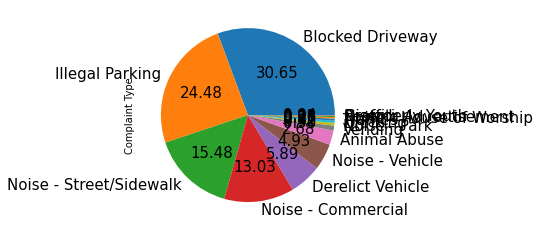

In [19]:
df["Complaint Type"].value_counts().plot.pie(fontsize = 15, autopct = '%.2f')

# different graphs representing data 

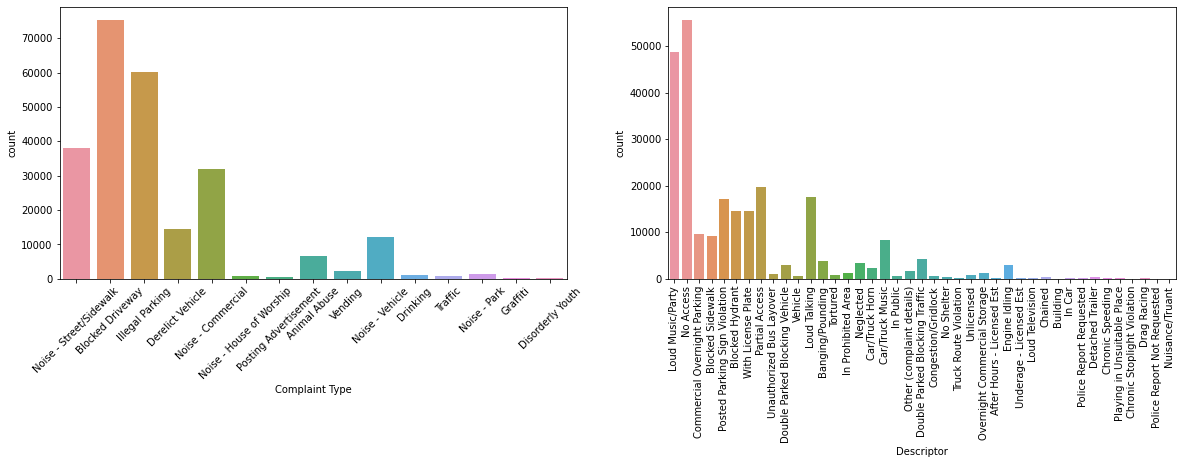

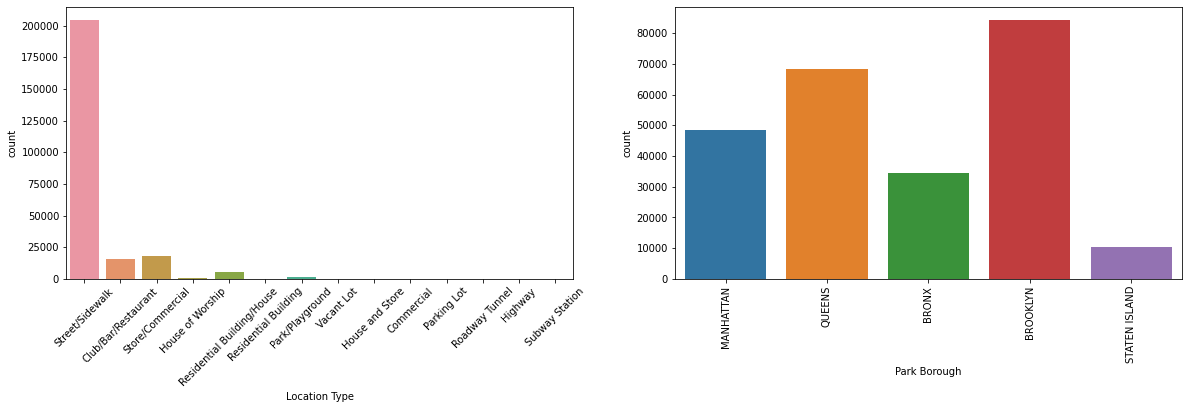

In [20]:
cat_cols = ["Complaint Type","Descriptor","Location Type","Park Borough"]
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=90)
    i += 1
    
    plt.show()

# Complaint type based on 20 entries

In [21]:
df["Complaint Type"].value_counts().head(20).iplot(kind="bar")

# graph-- no. of complaint types in each month

In [22]:
complaint_type=pd.crosstab(df['Complaint Type'],df['Month'])
complaint_type.iplot(kind="bar",barmode="stack")

# table of no. of complaints in each month

In [23]:
complaint_type

Month,3,4,5,6,7,8,9,10,11,12
Complaint Type,,,,,,,,,,
Animal Abuse,63,659,732,798,871,743,732,697,595,683
Blocked Driveway,702,6723,7903,8400,7447,7567,8507,9222,9467,9353
Derelict Vehicle,182,1352,1600,1720,1669,1661,1738,1509,1473,1573
Disorderly Youth,1,29,32,33,26,23,21,9,3,8
Drinking,7,64,133,127,137,150,142,87,77,83
Graffiti,3,15,12,9,7,12,11,12,9,5
Illegal Parking,564,5419,6339,6892,6453,6491,6950,6797,7075,7165
Noise - Commercial,286,3901,4349,3443,2581,2696,3375,3960,3774,3655
Noise - House of Worship,4,75,141,60,130,87,68,64,37,30


# sorted in descending order based on Month

In [24]:
df.sort_values(ascending=False,by="Month").head(6)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,Duration_days,Duration_minutes,Duration_seconds
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,12,2015,23,59,45,3,53,0.038368,55.25,3315.0
20245,2015-12-11 05:40:00,2015-12-11 07:49:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11219.0,975 52 STREET,52 STREET,...,12,2015,5,40,0,4,50,0.089583,129.00,7740.0
20257,2015-12-11 04:14:00,2015-12-11 05:02:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11204.0,1559 WEST 6 STREET,WEST 6 STREET,...,12,2015,4,14,0,4,50,0.033333,48.00,2880.0
20256,2015-12-11 04:28:00,2015-12-11 06:19:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11249.0,100 SOUTH 9 STREET,SOUTH 9 STREET,...,12,2015,4,28,0,4,50,0.077083,111.00,6660.0
20254,2015-12-11 04:34:00,2015-12-11 06:41:00,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11211.0,380 MORGAN AVENUE,MORGAN AVENUE,...,12,2015,4,34,0,4,50,0.088194,127.00,7620.0
20253,2015-12-11 04:52:00,2015-12-11 13:58:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453.0,2060 GRAND AVENUE,GRAND AVENUE,...,12,2015,4,52,0,4,50,0.379167,546.00,32760.0
